In [34]:
import torch

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [36]:
device

device(type='cuda')

In [37]:
from torchvision.datasets import MNIST

In [38]:
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

In [39]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and standard deviation for MNIST
])

# Step 2: Load the MNIST dataset
train_ds = MNIST(root='./data', train=True, download=True, transform=transform)
val_ds = MNIST(root='./data', train=False, download=True, transform=transform)

# Step 3: Create DataLoaders
train_loader = DataLoader(dataset=train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_ds, batch_size=64, shuffle=False)

In [40]:
train_ds[0][0].shape

torch.Size([1, 28, 28])

In [41]:
import torch.nn as nn
import torch.nn.functional as F

In [42]:
class GarmentClassifier(nn.Module):
  def __init__(self):
    super(GarmentClassifier,self).__init__()
    self.pool = nn.MaxPool2d(2, stride=2)
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(3,3),padding=1)
    self.batchnorm1 = nn.BatchNorm2d(6)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=(3,3),padding=1)
    self.batchnorm2 = nn.BatchNorm2d(16)
    self.conv3 = nn.Conv2d(16, 32, kernel_size=(3,3),padding=1)
    self.batchnorm3 = nn.BatchNorm2d(32)
    self.conv4 = nn.Conv2d(32, 64, kernel_size=(3,3),padding=1)
    self.batchnorm4 = nn.BatchNorm2d(64)
    self.fc1 = nn.Linear(64 * 1 * 1, 128)
    self.batchnorm5 = nn.BatchNorm1d(128)
    self.fc2 = nn.Linear(128, 128)
    self.batchnorm6 = nn.BatchNorm1d(128)
    self.fc3 = nn.Linear(128, 64)
    self.batchnorm7 = nn.BatchNorm1d(64)
    self.fc4 = nn.Linear(64, 32)
    self.batchnorm8 = nn.BatchNorm1d(32)
    self.fc5 = nn.Linear(32, 10)
    self.dropout = nn.Dropout1d(0.1)
  def forward(self,x):
    x = self.pool(F.mish(self.batchnorm1(self.conv1(x))))
    x = self.pool(F.mish(self.batchnorm2(self.conv2(x))))
    x = self.pool(F.mish(self.batchnorm3(self.conv3(x))))
    x = self.pool(F.mish(self.batchnorm4(self.conv4(x))))
    x = x.view(-1, 64 * 1 * 1)
    x = self.dropout(x)
    x = F.leaky_relu(self.batchnorm5(self.fc1(x)))
    x = F.leaky_relu(self.batchnorm6(self.fc2(x)))
    x = F.leaky_relu(self.batchnorm7(self.fc3(x)))
    x = F.leaky_relu(self.batchnorm8(self.fc4(x)))
    x = self.fc5(x)
    return x


In [43]:
model = GarmentClassifier()
model.to(device)

GarmentClassifier(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (batchnorm5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=128,

In [44]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]              60
       BatchNorm2d-2            [-1, 6, 28, 28]              12
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 14, 14]             880
       BatchNorm2d-5           [-1, 16, 14, 14]              32
         MaxPool2d-6             [-1, 16, 7, 7]               0
            Conv2d-7             [-1, 32, 7, 7]           4,640
       BatchNorm2d-8             [-1, 32, 7, 7]              64
         MaxPool2d-9             [-1, 32, 3, 3]               0
           Conv2d-10             [-1, 64, 3, 3]          18,496
      BatchNorm2d-11             [-1, 64, 3, 3]             128
        MaxPool2d-12             [-1, 64, 1, 1]               0
        Dropout1d-13                   [-1, 64]               0
           Linear-14                  [

In [45]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [46]:
from trainer import Trainer

In [47]:
# class Trainer:
#     def __init__(self, model: torch.nn.Module,
#                  epochs: int,
#                  criterion: torch.nn.Module,
#                  input_shape: Tuple[int],
#                  output_shape: Tuple[int],
#                  optimizer: torch.optim.Optimizer,
#                  metrics: Optional[Union[str, List[str]]] = None,
#                  callbacks: Optional[List[Callback]] = None,
#                  display_time_elapsed: bool = False,
#                  roff: int = 5,
#                  report_in_one_line: bool = True,
#                  clear_cuda_cache: bool = True,
#                  use_amp: bool = True,
#                  device: torch.device = torch.device('cpu')):

In [48]:
trainer = Trainer( model,
                 epochs=4,
                 criterion=loss_fn,
                 input_shape=(1,28,28),
                 output_shape=(10,),
                 optimizer=optimizer,
                 display_time_elapsed=True,
                 metrics=['accuracy'])

Model is initialized properly


In [49]:
accuracy = trainer.tracker.create_link("accuracy")

@trainer.add_event(2)
def event():
  if trainer.current_epoch%2==0:
      accuracy.snap_and_reset()

In [50]:
history = trainer.fit(train_loader,val_loader)

EPOCH 1: : 938it [00:51, 18.39it/s]


--> Metrics:   accuracy: 0.8646 ,val_accuracy: 0.9791 ,loss: 0.3934 ,val_loss: 0.0804
Time elapsed: 56.2708785533905 s


EPOCH 2: : 938it [00:50, 18.64it/s]


--> Metrics:   accuracy: 0.8899 ,val_accuracy: 0.9837 ,loss: 0.3033 ,val_loss: 0.0529
Time elapsed: 111.75822281837463 s


EPOCH 3: : 74it [00:04, 18.00it/s]


KeyboardInterrupt: 

In [46]:
accuracy.records

[0.863456156716418, 0.8917160847547975]

In [47]:
history

{'accuracy': [0.863456156716418,
  0.8901918976545842,
  0.8932402718550106,
  0.8962053571428571],
 'val_accuracy': [0.9692476114649682,
  0.971437101910828,
  0.9833797770700637,
  0.9868630573248408],
 'loss': [0.3995947471535854,
  0.30448367221475536,
  0.29247561910116215,
  0.2797267585833952],
 'val_loss': [0.10321078582067683,
  0.0938900205170273,
  0.056194735439583234,
  0.046481402809242275]}

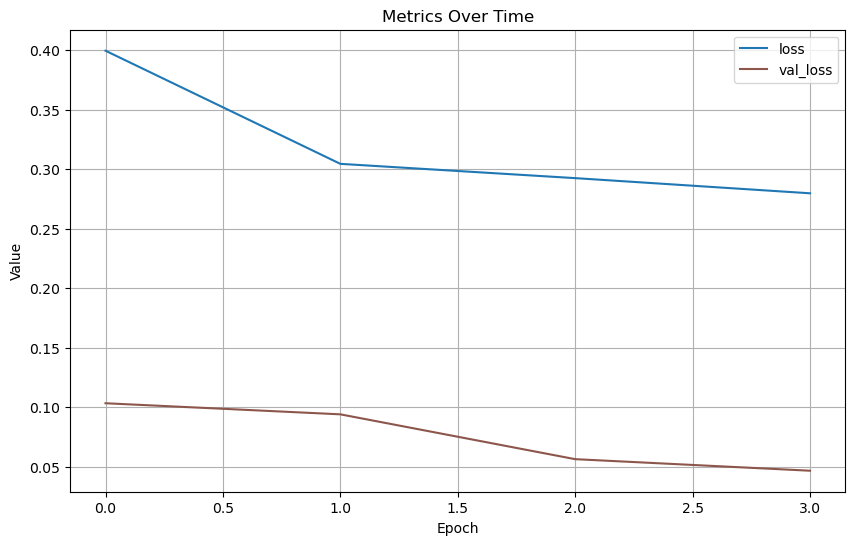

In [48]:
trainer.tracker.plot("loss", "val_loss")

In [51]:
sm = summary(model.to(device),(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]              60
       BatchNorm2d-2            [-1, 6, 28, 28]              12
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 14, 14]             880
       BatchNorm2d-5           [-1, 16, 14, 14]              32
         MaxPool2d-6             [-1, 16, 7, 7]               0
            Conv2d-7             [-1, 32, 7, 7]           4,640
       BatchNorm2d-8             [-1, 32, 7, 7]              64
         MaxPool2d-9             [-1, 32, 3, 3]               0
           Conv2d-10             [-1, 64, 3, 3]          18,496
      BatchNorm2d-11             [-1, 64, 3, 3]             128
        MaxPool2d-12             [-1, 64, 1, 1]               0
        Dropout1d-13                   [-1, 64]               0
           Linear-14                  [

In [53]:
type(sm)

NoneType